<a href="https://colab.research.google.com/github/A-R-M-028/CarPrice-Prediction-Using-Ensemble-Technique-and-Random-Forest-Regressor/blob/main/D40_Project_4_CarPrice_Prediction_Using_Ensemble_Technique_and_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [222]:
# Use comments
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV # CV -> Cross Validation
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Problem Statement

You have been provided with the Car details along with its price. Based on the given data, you need to predict the price of the Car.

# Defining the dataset

Link: https://drive.google.com/file/d/18xxy7kEGzp3vAwsA7QtrjyAwhffPiowo/view?usp=sharing

In [72]:
df = pd.read_csv("/content/drive/MyDrive/Projects/ML/CarPrice_Assignment.csv")

# Exploratory Data Analysis

In [73]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [75]:
df.shape

(205, 26)

*Here we see that 26 column that is too much for ml so we have to reduce it and inc what will make big impact in our accuracy -> Do Feature Engineering*

In [76]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [77]:
# car_ID                int64
# symboling             int64
# wheelbase           float64
# carlength           float64
# carwidth            float64
# carheight           float64
# curbweight            int64
# enginesize            int64
# boreratio           float64
# stroke              float64
# compressionratio    float64
# horsepower            int64
# peakrpm               int64
# citympg               int64
# highwaympg            int64
# price               float64

# # Need to convert
# CarName              object
# fueltype             object
# aspiration           object
# doornumber           object
# carbody              object
# drivewheel           object
# enginelocation       object
# enginetype           object
# cylindernumber       object
# fuelsystem           object

In [78]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [80]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [81]:
df.isna().sum().sum() # No null values

0

In [82]:
df.duplicated().sum() # No duplicated value

0

In [83]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Feature Engineering


In [84]:
# CarName              object

In [85]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [86]:
df['CarName'].nunique() # 147 Unique values

147

# *What should do now?*
*Here based on situation we replace all model name to it's brand name or company name*

In [87]:
df.CarName[0] # Remove after space to find company name

'alfa-romero giulia'

In [88]:
# Pattern
re.sub(' .*', '' , df.CarName[0]) # Working -> When found space remove after that

'alfa-romero'

In [89]:
lis = []
 # can also len(df)
for i in range(len(df)):
  brand_name = re.sub(' .*', '' , df.CarName[i])
  lis.append(brand_name)

In [90]:
len(lis)

205

In [91]:
# Update the CarName
df['CarName'] = pd.DataFrame(lis)

In [92]:
df['CarName'].unique() # Some duplicate names are there so fix that

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [93]:
df['CarName'].nunique()

28

In [94]:
# maxda -> mazda
# Nissan -> nissan
# porcshce -> porsche
# toyouta -> toyota
# vokswagen & vw -> volkswagen

# 147 -> 28 -> 22

In [95]:
df.CarName.replace(['maxda', 'Nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw'], ['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen']).nunique()

22

In [96]:
df.CarName.replace(['maxda', 'Nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw'], ['mazda', 'nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen'], inplace = True)

In [97]:
df.CarName.nunique()

22

In [98]:
df.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

In [99]:
df[['CarName']]

,CarName
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [100]:
# Put other to less value_points, reduce categories

In [101]:
arr = df.CarName.value_counts() # Similar to pairs

def new_cat(x):
  if x in arr[arr<=10]:
    return 'other'
  else:
    return x

df.CarName = df.CarName.apply(new_cat)

In [102]:
# result = DataFrame.apply(function, axis=0)  # For DataFrame, for row -> 1
# result = Series.apply(function)            # For Series

In [103]:
df.CarName.value_counts()

other         66
toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
volkswagen    12
peugeot       11
volvo         11
Name: CarName, dtype: int64

In [104]:
# 147 -> 28 -> 22 -> 10 # Now perfectly fine

In [105]:
# Now apply label encoder or replace

In [106]:
# df.CarName.replace(df.CarName.unique(), [i for i in range(0, 10)])
# 0 (inclusive) to 10 (exclusive) -> 0 to 9 -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Or
enc = LabelEncoder()
df.CarName = enc.fit_transform(df.CarName)

In [107]:
df.CarName.value_counts()

4    66
7    32
3    18
1    17
0    13
2    13
6    12
8    12
5    11
9    11
Name: CarName, dtype: int64

In [108]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,4,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,4,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,4,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [109]:
# Drop CarID
df.drop('car_ID', axis = 1, inplace = True)

In [110]:
df.head(1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,4,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [111]:
# symboling -> Insurance risk for the insurance company (Company perspective)
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [112]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [113]:
# fueltype
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [114]:
# df.fueltype.replace(['gas', 'diesel'], [0, 1]).value_counts()
# df.fueltype.replace(df.fueltype.unique(), [1, 2])
df.fueltype = enc.fit_transform(df.fueltype)

In [115]:
df.fueltype.value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [116]:
df.fueltype.unique()

array([1, 0])

In [117]:
# aspiration
df.aspiration = enc.fit_transform(df.aspiration)

In [118]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [119]:
df.carbody.replace(df.carbody.unique(), [0, 1, 2, 3, 4], inplace = True)

In [120]:
df.carbody.replace(df.carbody.unique(), [0, 1, 2, 3, 4]).value_counts()

2    96
1    70
3    25
4     8
0     6
Name: carbody, dtype: int64

In [121]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [122]:
df.drivewheel.replace(df.drivewheel.unique(), [0, 1, 2], inplace = True)

In [123]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [124]:
df.enginelocation.replace(df.enginelocation.unique(), [0, 1], inplace = True)

In [125]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [126]:
df.enginetype.replace(df.enginetype.unique(), [i for i in range (7)], inplace = True)

In [127]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [128]:
df.cylindernumber.replace(df.cylindernumber.unique(), [i for i in range (7)], inplace = True)

In [129]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [130]:
df.fuelsystem.replace(df.fuelsystem.unique(), [i for i in range (8)], inplace = True)

In [131]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [132]:
df.doornumber.replace(df.doornumber.unique(), [i for i in range (2)], inplace = True)

In [133]:
df.head(1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,4,1,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0


In [134]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [136]:
# All sorted -> Converted => Cleaned

# Visualization

In [137]:
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.245175,0.194311,-0.059866,-0.664073,-0.398970,0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.016678,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.245175,1.000000,-0.132140,0.090377,0.243736,0.203203,-0.154167,-0.021305,0.278608,0.272082,...,0.077738,-0.219125,0.258829,-0.225661,0.148286,0.043951,-0.274441,-0.050219,-0.077620,0.063014
fueltype,0.194311,-0.132140,1.000000,-0.401397,-0.191491,-0.157580,0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,-0.682404,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.090377,-0.401397,1.000000,0.031792,0.021276,-0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.473355,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.243736,-0.191491,0.031792,1.000000,0.447534,0.098954,-0.137757,0.447357,0.398568,...,0.020742,-0.017936,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.398970,0.203203,-0.157580,0.021276,0.447534,1.000000,-0.056886,0.126546,0.368772,0.376842,...,0.172381,-0.054724,0.224976,0.000598,0.156686,0.047234,-0.147031,-0.095826,-0.126939,0.161294
drivewheel,0.041671,-0.154167,0.132257,-0.066465,0.098954,-0.056886,1.000000,-0.147865,-0.459745,-0.485649,...,-0.524307,0.036437,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
enginelocation,0.212471,-0.021305,0.040070,-0.057191,-0.137757,0.126546,-0.147865,1.000000,-0.187790,-0.050989,...,0.196826,-0.082672,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.278608,-0.308346,0.257611,0.447357,0.368772,-0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.004828,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.272082,-0.212679,0.234539,0.398568,0.376842,-0.485649,-0.050989,0.874587,1.000000,...,0.683360,-0.090618,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


<Axes: >

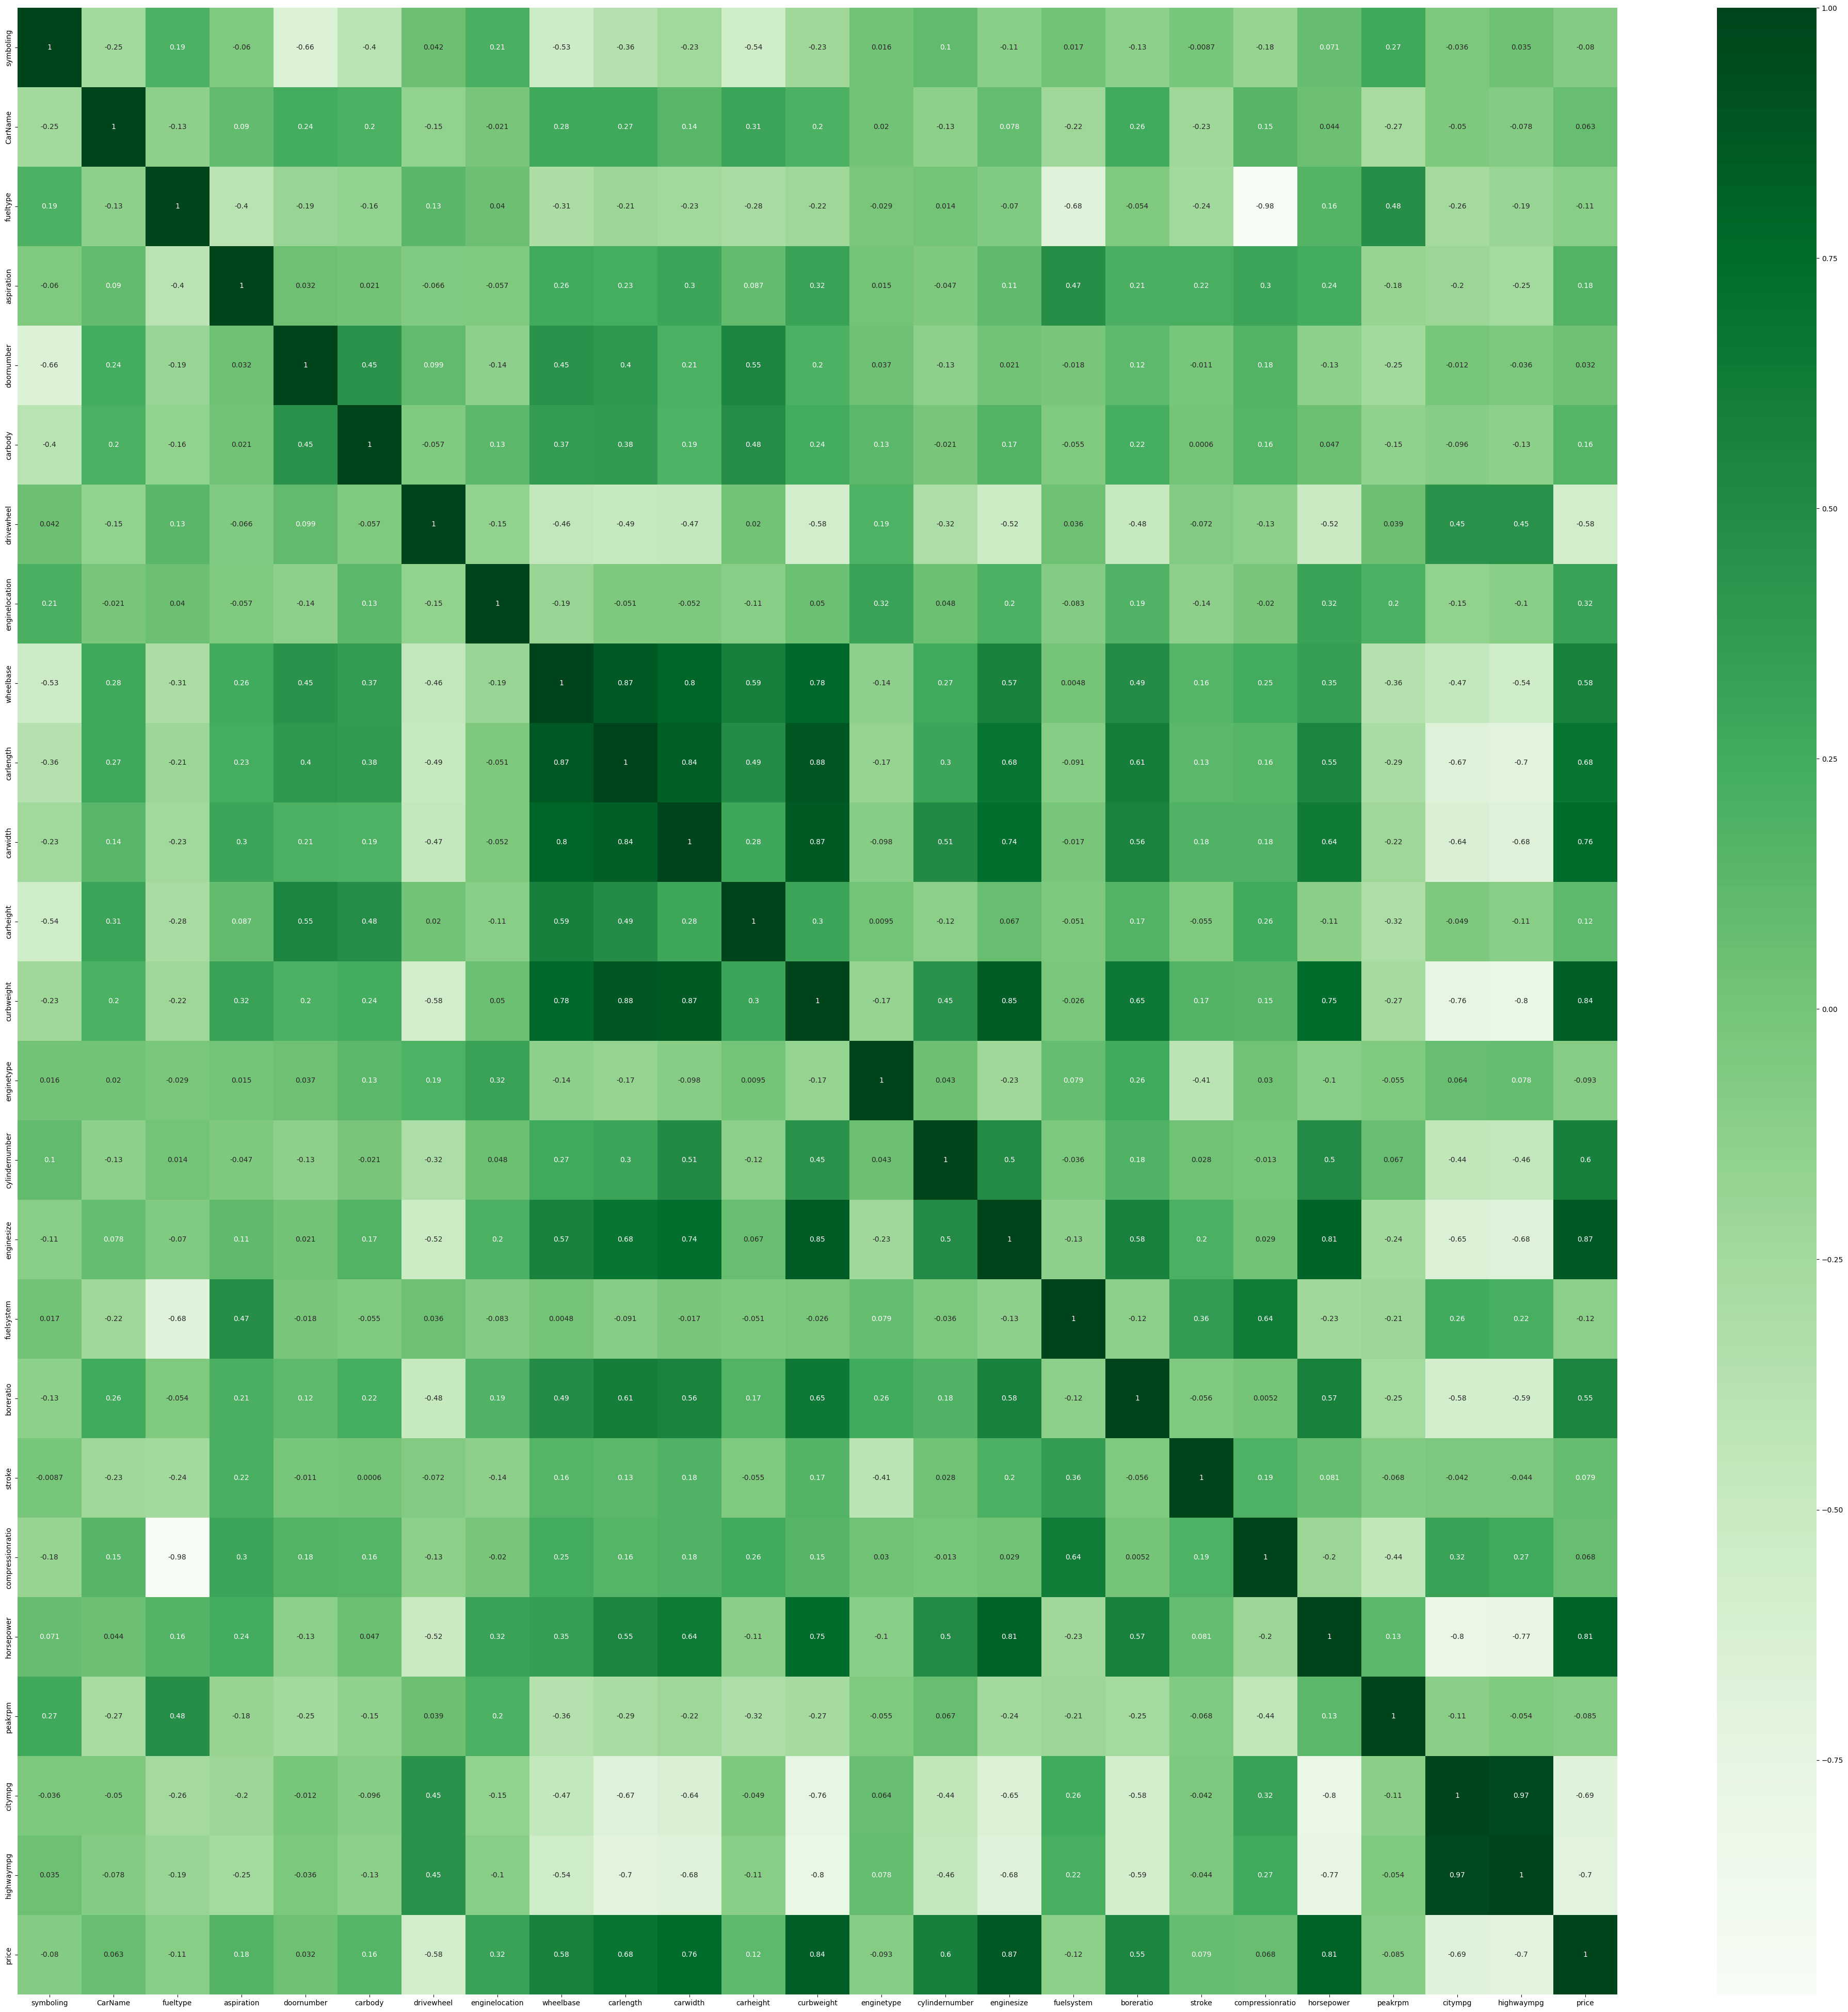

In [138]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

In [139]:
# sns.pairplot(df)

*Total random variables -> 25 *
<br>
*24 feature and 1 is target*

# Selecting the feature and terget:


In [140]:
x = df.drop('price', axis = 1)
y = df.price

In [141]:
x

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,4,1,0,0,0,0,0,88.6,168.8,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,4,1,0,0,0,0,0,88.6,168.8,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,4,1,0,0,1,0,0,94.5,171.2,...,1,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,1,2,1,0,99.8,176.6,...,0,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,4,1,0,1,2,2,0,99.4,176.6,...,2,136,0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,9,1,0,1,2,0,0,109.1,188.8,...,0,141,0,3.78,3.15,9.5,114,5400,23,28
201,-1,9,1,1,1,2,0,0,109.1,188.8,...,0,141,0,3.78,3.15,8.7,160,5300,19,25
202,-1,9,1,0,1,2,0,0,109.1,188.8,...,1,173,0,3.58,2.87,8.8,134,5500,18,23
203,-1,9,0,1,1,2,0,0,109.1,188.8,...,1,145,6,3.01,3.40,23.0,106,4800,26,27


In [142]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

# Feature Selection: (Feature Importance)
### Adv technique ->

In [143]:
model = ExtraTreesRegressor()

In [144]:
model.fit(x, y) # Compare with target which feature is important to take

ExtraTreesRegressor()

In [145]:
model.feature_importances_ # This is value of importance

array([0.00274627, 0.01302122, 0.00173402, 0.01137713, 0.00205331,
       0.00494126, 0.06395597, 0.02169976, 0.01692016, 0.01750589,
       0.08193486, 0.00576006, 0.17856329, 0.00511676, 0.05684444,
       0.22932048, 0.0060596 , 0.02301447, 0.00532142, 0.00347349,
       0.11868444, 0.0182076 , 0.05884363, 0.05290048])

* Top 10 feature w.r.t target

In [146]:
important_features = pd.Series(model.feature_importances_, index = x.columns)

In [147]:
important_features

symboling           0.002746
CarName             0.013021
fueltype            0.001734
aspiration          0.011377
doornumber          0.002053
carbody             0.004941
drivewheel          0.063956
enginelocation      0.021700
wheelbase           0.016920
carlength           0.017506
carwidth            0.081935
carheight           0.005760
curbweight          0.178563
enginetype          0.005117
cylindernumber      0.056844
enginesize          0.229320
fuelsystem          0.006060
boreratio           0.023014
stroke              0.005321
compressionratio    0.003473
horsepower          0.118684
peakrpm             0.018208
citympg             0.058844
highwaympg          0.052900
dtype: float64

<Axes: >

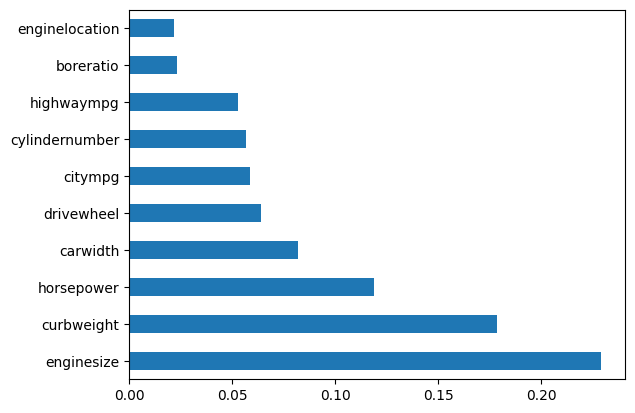

In [157]:
# Top 10
important_features.nlargest(10).plot(kind='barh')
# important_features.nlargest(20).plot(kind='barh')

In [149]:
important_features.nlargest(20)

enginesize        0.229320
curbweight        0.178563
horsepower        0.118684
carwidth          0.081935
drivewheel        0.063956
citympg           0.058844
cylindernumber    0.056844
highwaympg        0.052900
boreratio         0.023014
enginelocation    0.021700
peakrpm           0.018208
carlength         0.017506
wheelbase         0.016920
CarName           0.013021
aspiration        0.011377
fuelsystem        0.006060
carheight         0.005760
stroke            0.005321
enginetype        0.005117
carbody           0.004941
dtype: float64

In [150]:
important_features.nlargest(20).index

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'drivewheel',
       'citympg', 'cylindernumber', 'highwaympg', 'boreratio',
       'enginelocation', 'peakrpm', 'carlength', 'wheelbase', 'CarName',
       'aspiration', 'fuelsystem', 'carheight', 'stroke', 'enginetype',
       'carbody'],
      dtype='object')

In [151]:
asd = important_features.nlargest(10).index

In [152]:
list[asd]

list[Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'drivewheel',
       'citympg', 'cylindernumber', 'highwaympg', 'boreratio',
       'enginelocation'],
      dtype='object')]

In [153]:
df[list(asd)]

,enginesize,curbweight,horsepower,carwidth,drivewheel,citympg,cylindernumber,highwaympg,boreratio,enginelocation
0,130,2548,111,64.1,0,21,0,27,3.47,0
1,130,2548,111,64.1,0,21,0,27,3.47,0
2,152,2823,154,65.5,0,19,1,26,2.68,0
3,109,2337,102,66.2,1,24,0,30,3.19,0
4,136,2824,115,66.4,2,18,2,22,3.19,0
...,...,...,...,...,...,...,...,...,...,...
200,141,2952,114,68.9,0,23,0,28,3.78,0
201,141,3049,160,68.8,0,19,0,25,3.78,0
202,173,3012,134,68.9,0,18,1,23,3.58,0
203,145,3217,106,68.9,0,26,1,27,3.01,0


In [154]:
x_new = df[list(asd)]

In [155]:
len(x_new)

205

In [156]:
x_new.shape # Now col is 10 not 24

(205, 10)

# ML - Choosing Appropriate Model

In [159]:
model = RandomForestRegressor()

## Performing Hyperparameter Tuning:
*To get the best parametric value for the model using RandomizedSearchCV(Each suitable parametric value to achive accuracy)*
<br>
Source: SkLearn
<br>
The more you take the parameter more time the model will take then it can run a day or week or months

In [182]:
# No of trees in a Random Forest -> By default 100
n_estimators = [int(i) for i in range(100, 1201, 100)] # 100 200 300...........1200 -> 12 values

# No of features to conssider at every split
max_features = ['sqrt', 'auto']

# Maximum number of levels in a tree
max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [183]:
random_grid = {
    # Key: value
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [165]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['sqrt', 'auto'],
 'max_depth': [5.0, 10.0, 15.0, 20.0, 25.0, 30.0],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [184]:
# Model
rf_random = RandomizedSearchCV( estimator = model ,
                                param_distributions = random_grid,
                                scoring = 'neg_mean_squared_error',
                                n_jobs = 1,
                                random_state = 42,
                                cv = 5)

# Spliting the dataset into Training & Testing

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.15, random_state = 42)

In [186]:
len(x_train)

174

In [187]:
len(x_test)

31

# Train the model

In [188]:
rf_random.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [190]:
rf_random.best_params_ # This is the best parametric value -> Highest Accuracy

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

*Hyper Paremeter Tuning is done*

# Testing

In [193]:
y_predict = rf_random.predict(x_test)

In [198]:
final_df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_predict
})

In [199]:
final_df

,Actual,Predicted
15,30760.000,35406.013571
9,17859.167,18192.226333
100,9549.000,9045.770667
132,11850.000,13079.103333
68,28248.000,29037.568000
95,7799.000,7329.088283
159,7788.000,7834.860000
162,9258.000,7995.890000
147,10198.000,10344.504833
182,7775.000,8037.201200


In [200]:
final_df.corr()

,Actual,Predicted
Actual,1.000000,0.977896
Predicted,0.977896,1.000000


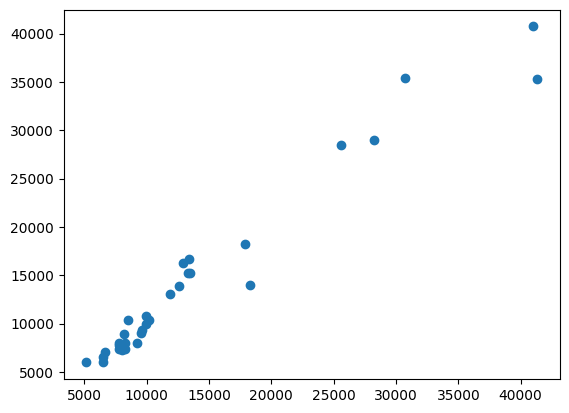

In [201]:
plt.scatter(y_test, y_predict)

# Performance Metric

In [202]:
# With hyper parameter tuning with 5 parameter
r2_score(y_test, y_predict)

0.9545544388375918

In [ ]:
# 96% Accuracy

# With Random Forest Regressor without Hyper Parameter Tuning

In [204]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [213]:
rf_predict = model.predict(x_test)

In [214]:
r2_score(y_test, rf_predict)

0.9567383325524383

In [210]:
# Same result -> 95% Accuracy

R-squared score: 0.9567383325524383


# With Decision Tree Regressor without Hyper Parameter Tuning

In [217]:
dt_model = DecisionTreeRegressor()

In [218]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [219]:
y_predict = dt_model.predict(x_test)

In [221]:
r2_score(y_test, y_predict)

0.9284694891902082

In [ ]:
# 92% Accuracy

# With Linear Regression without Hyper Parameter Tuning

In [224]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_predict = lr_model.predict(x_test)
r2_score(y_test, y_predict)

0.8196076108074938

In [ ]:
# 81% Accuracy

* RF -> 95% Accuracy
* DT -> 92% Accuracy
* LR -> 81% Accuracy
* HPT -> 96% Accuracy